# Two ways to use ingrid in python

## 1. generate OPeNDAP URL in ingrid Data Catalog

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

nc_url = "http://carney.ldeo.columbia.edu:81/expert/SOURCES/.WORLDBATH432/.bath/\
[X/Y]/1/SM121/0/min/(bath)rn/dods"
dsURL = xr.open_dataset(nc_url)

but the URLs can get long, you have to go to the Data Library to generate them and the encoding is often a problem, so ...

## 2. write ingrid code and pipe it to ingrid executable

In [6]:
from subprocess import Popen, PIPE

# generate a multiline string containing the ingrid commands:
ingridcode = """
\\begin{ingrid}
SOURCES .WORLDBATH432 .bath [X Y] 1 SM121 0 min (bath)rn
(bath.nc)writeCDF 
\\end{ingrid}
""" 

# and then pipe it to the ingrid executable:
p = Popen(['/usr/local/bin/ingrid'], stdin=PIPE, stdout=PIPE) 
ingridout, ingriderr = p.communicate(input=bytes(ingridcode, 'utf-8'))

# now there will be the netcdf file, 'bath.nc' in your local directory
nc_file = 'bath.nc'
dsCODE = xr.open_dataset(nc_file)

These commands are hard to remember, so I have written a python module:

In [7]:
# need to import the new command
import sys
sys.path.append("/net/carney/home/naomi/mymodules")
from ingrid.code import callIngrid

# so instead of the p = Popen(...) and the call to p.communicate:
callIngrid(ingridcode)

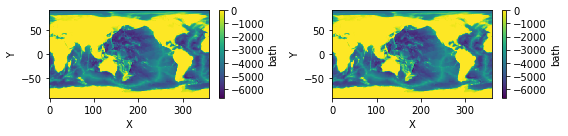

In [8]:
# to see that both give the same result:
plt.figure(figsize=(8,2))
plt.subplot(121)
dsURL.bath.plot()
plt.subplot(122)
dsCODE.bath.plot()
plt.tight_layout()

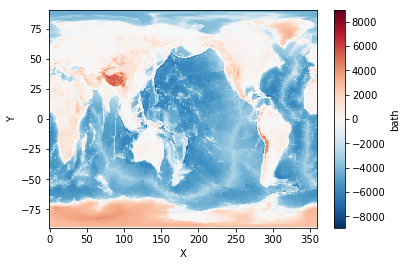

In [19]:
# Ingrid comments should begin with %%
# Variable substitution can be done a couple of ways, here is one:

var = 'bath'

ingridcode = """
\\begin{ingrid}
SOURCES .WORLDBATH432 .%s
(%s-another.nc)writeCDF 
%%X Y fig: colors :fig .ps
\\end{ingrid}
"""  %(var, var)

callIngrid(ingridcode)
xr.open_dataset('bath-another.nc').bath.plot()